# [Python Course Original Link](https://www.python-course.eu/neural_networks_with_scikit.php)

In [1]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
from sklearn.neural_network import MLPClassifier
X = [[0., 0.], [0., 1.], [1., 0.], [1., 1.]]
y = [0, 0, 0, 1]
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)
print(clf.fit(X, y))

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)


In [3]:
print("weights between input and first hidden layer:")
print(clf.coefs_[0])
print("\nweights between first hidden and second hidden layer:")
print(clf.coefs_[1])

weights between input and first hidden layer:
[[-0.14203691 -1.18304359 -0.85567518 -4.53250719 -0.60466275]
 [-0.69781111 -3.5850093  -0.26436018 -4.39161248  0.06644423]]

weights between first hidden and second hidden layer:
[[ 0.29179638 -0.14155284]
 [ 4.02666592 -0.61556475]
 [-0.51677234  0.51479708]
 [ 7.37215202 -0.31936965]
 [ 0.32920668  0.64428109]]


We can get the values for w0 and w1 from clf.coefs_ like this:

w0= clf.coefs_[0][0][0] and w1= clf.coefs_[0][1][0]

In [4]:
print("w0 = ", clf.coefs_[0][0][0])
print("w1 = ", clf.coefs_[0][1][0])

w0 =  -0.14203691267827181
w1 =  -0.697811114977869


The weight vector of H00 can be accessed with

In [5]:
clf.coefs_[0][:,0]

array([-0.14203691, -0.69781111])

We can generalize the above to access a neuron Hij in the following way:

In [6]:
for i in range(len(clf.coefs_)):
    number_neurons_in_layer = clf.coefs_[i].shape[1]
    for j in range(number_neurons_in_layer):
        weights = clf.coefs_[i][:,j]
        print(i, j, weights, end=", ")
        print()
    print()

0 0 [-0.14203691 -0.69781111], 
0 1 [-1.18304359 -3.5850093 ], 
0 2 [-0.85567518 -0.26436018], 
0 3 [-4.53250719 -4.39161248], 
0 4 [-0.60466275  0.06644423], 

1 0 [ 0.29179638  4.02666592 -0.51677234  7.37215202  0.32920668], 
1 1 [-0.14155284 -0.61556475  0.51479708 -0.31936965  0.64428109], 

2 0 [-4.96774269 -0.86330397], 



intercepts_ is a list of bias vectors, where the vector at index i represents the bias values added to layer i+1.

In [7]:
print("Bias values for first hidden layer:")
print(clf.intercepts_[0])
print("\nBias values for second hidden layer:")
print(clf.intercepts_[1])

Bias values for first hidden layer:
[-0.14962269 -0.59232707 -0.5472481   7.02667699 -0.87510813]

Bias values for second hidden layer:
[-3.61417672 -0.76834882]


The main reason, why we train a classifier is to predict results for new samples. We can do this with the predict method. The method returns a predicted class for a sample, in our case a "0" or a "1" :

In [8]:
result = clf.predict([[0, 0], [0, 1], 
                      [1, 0], [0, 1], 
                      [1, 1], [2., 2.],
                      [1.3, 1.3], [2, 4.8]])
result

array([0, 0, 0, 0, 1, 1, 1, 1])

Instead of just looking at the class results, we can also use the predict_proba method to get the probability estimates.

In [9]:
prob_results = clf.predict_proba([[0, 0], [0, 1], 
                                  [1, 0], [0, 1], 
                                  [1, 1], [2., 2.], 
                                  [1.3, 1.3], [2, 4.8]])
print(prob_results)

[[1.00000000e+000 5.25723951e-101]
 [1.00000000e+000 3.71534882e-031]
 [1.00000000e+000 6.47069178e-029]
 [1.00000000e+000 3.71534882e-031]
 [2.07145538e-004 9.99792854e-001]
 [2.07145538e-004 9.99792854e-001]
 [2.07145538e-004 9.99792854e-001]
 [2.07145538e-004 9.99792854e-001]]


prob_results[i][0] gives us the probability for the class0, i.e. a "0" and results[i][1] the probabilty for a "1". i corresponds to the ith sample.

# ---------Another Example---------

We will populate two clusters (class0 and class1) in a two dimensional space.

Text(0.5,1,'Original X and Y for Class 0 and 1')

Text(0.5,1,'X and Y with added points')

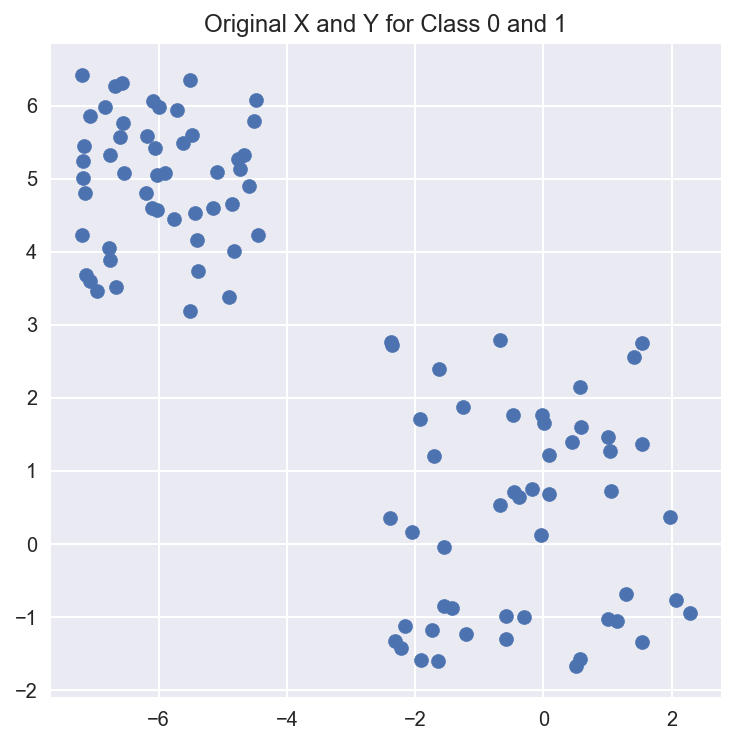

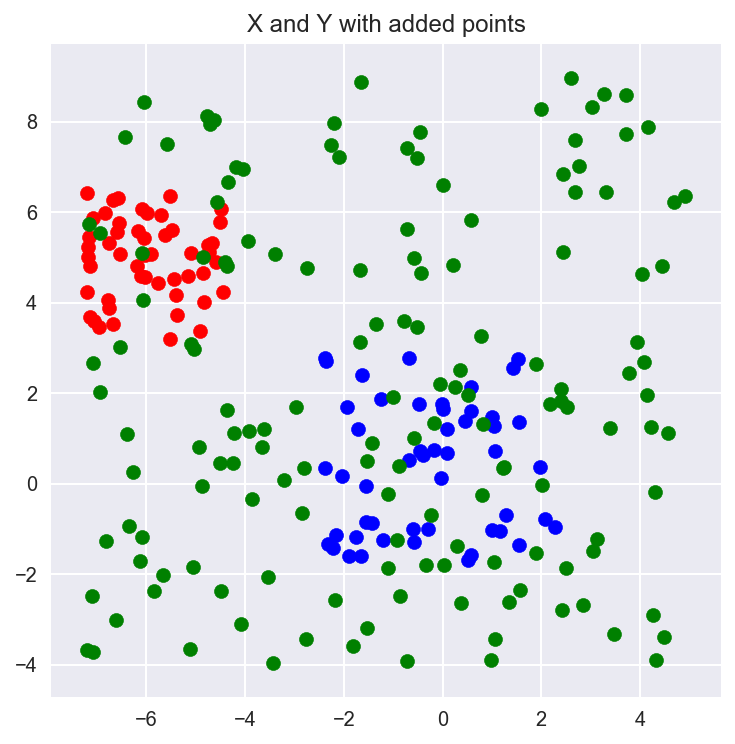

In [10]:
npoints = 50
X, Y = [], []
# class 0
X.append(np.random.uniform(low=-2.5, high=2.3, size=(npoints,)) )
Y.append(np.random.uniform(low=-1.7, high=2.8, size=(npoints,)))
# class 1
X.append(np.random.uniform(low=-7.2, high=-4.4, size=(npoints,)) )
Y.append(np.random.uniform(low=3, high=6.5, size=(npoints,)))
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(X, Y)
ax.set_title("Original X and Y for Class 0 and 1")

learnset = []
learnlabels = []
for i in range(2):
    # adding points of class i to learnset
    points = zip(X[i], Y[i])
    for p in points:
        learnset.append(p)
        learnlabels.append(i)
npoints_test = 3 * npoints
TestX = np.random.uniform(low=-7.2, high=5, size=(npoints_test,)) 
TestY = np.random.uniform(low=-4, high=9, size=(npoints_test,))
testset = []
points = zip(TestX, TestY)
for p in points:
    testset.append(p)
colours = ["b", "r"]

fig2, ax2 = plt.subplots(figsize=(6, 6))

for i in range(2):
    ax2.scatter(X[i], Y[i], c=colours[i])
ax2.scatter(TestX, TestY, c="g")
ax2.set_title("X and Y with added points")


We will train a MLPClassifier for our two classes:

In [11]:
from sklearn.datasets import fetch_mldata
from sklearn.neural_network import MLPClassifier

In [12]:
# Default code from the website
mlp = MLPClassifier(hidden_layer_sizes=(20, 3), max_iter=150, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)

# Modified code for experiments
# mlp = MLPClassifier(hidden_layer_sizes=(20, 3), max_iter=1500, alpha=1e-4,
#                     solver='sgd', verbose=10, tol=1e-6, random_state=1,
#                     learning_rate_init=.1)

mlp.fit(learnset, learnlabels)
print("Training set score: %f" % mlp.score(learnset, learnlabels))
print("Test set score: %f" % mlp.score(learnset, learnlabels))
print("Classes: {}".format(mlp.classes_))

Iteration 1, loss = 0.51570183
Iteration 2, loss = 0.47449284
Iteration 3, loss = 0.43364161
Iteration 4, loss = 0.38611988
Iteration 5, loss = 0.35249127
Iteration 6, loss = 0.32435362
Iteration 7, loss = 0.29583901
Iteration 8, loss = 0.26829075
Iteration 9, loss = 0.24260248
Iteration 10, loss = 0.21880013
Iteration 11, loss = 0.19678262
Iteration 12, loss = 0.17661370
Iteration 13, loss = 0.15845910
Iteration 14, loss = 0.14218428
Iteration 15, loss = 0.12771144
Iteration 16, loss = 0.11489852
Iteration 17, loss = 0.10359591
Iteration 18, loss = 0.09367143
Iteration 19, loss = 0.08501450
Iteration 20, loss = 0.07744673
Iteration 21, loss = 0.07081763
Iteration 22, loss = 0.06498940
Iteration 23, loss = 0.05984236
Iteration 24, loss = 0.05528232
Iteration 25, loss = 0.05123571
Iteration 26, loss = 0.04764139
Iteration 27, loss = 0.04444459
Iteration 28, loss = 0.04159519
Iteration 29, loss = 0.03904927
Iteration 30, loss = 0.03676591
Iteration 31, loss = 0.03471137
Iteration 32, los

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(20, 3), learning_rate='constant',
       learning_rate_init=0.1, max_iter=150, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=10,
       warm_start=False)

Training set score: 1.000000
Test set score: 1.000000
Classes: [0 1]


In [13]:
predictions = clf.predict(testset)
predictions

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0])

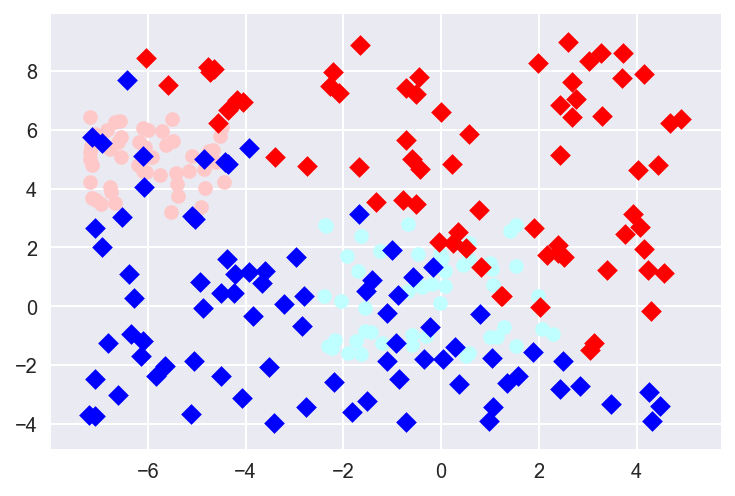

In [14]:
testset = np.array(testset)
# testset[predictions==1]
colours = ['#C0FFFF', "#FFC8C8"]
for i in range(2):
    plt.scatter(X[i], Y[i], c=colours[i])
colours = ["b", "r"]
for i in range(2):
    cls = testset[predictions==i]
    Xt, Yt = zip(*cls)
    plt.scatter(Xt, Yt, marker="D", c=colours[i])

# ---------Another Example---------

# MNIST Dataset
We have already used the MNIST dataset in the chapter Testing with MNIST of our tutorial. You will also find some explanations about this dataset.

We want to apply the MLPClassifier on the MNIST data. So far we have used our locally stored MNIST data. sklearn provides also this dataset, as we can see in the following:

In [15]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata
from sklearn.neural_network import MLPClassifier

In [16]:
mnist = fetch_mldata("MNIST original")

In [17]:
mnist.data
mnist.data.shape

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

(70000, 784)

In [19]:
X, y = mnist.data / 255., mnist.target
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]
mlp = MLPClassifier(hidden_layer_sizes=(100, ), max_iter=40, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)
mlp.fit(X_train, y_train)

Iteration 1, loss = 0.29711511
Iteration 2, loss = 0.12543994
Iteration 3, loss = 0.08891995
Iteration 4, loss = 0.06980587
Iteration 5, loss = 0.05722261
Iteration 6, loss = 0.04768470
Iteration 7, loss = 0.03988128
Iteration 8, loss = 0.03484239
Iteration 9, loss = 0.02850733
Iteration 10, loss = 0.02373436
Iteration 11, loss = 0.02096870
Iteration 12, loss = 0.01726910
Iteration 13, loss = 0.01428864
Iteration 14, loss = 0.01236551
Iteration 15, loss = 0.00987732
Iteration 16, loss = 0.00843697
Iteration 17, loss = 0.00738563
Iteration 18, loss = 0.00642474
Iteration 19, loss = 0.00526446
Iteration 20, loss = 0.00438302
Iteration 21, loss = 0.00376373
Iteration 22, loss = 0.00345448
Iteration 23, loss = 0.00302641
Iteration 24, loss = 0.00269291
Iteration 25, loss = 0.00255057
Iteration 26, loss = 0.00235068
Iteration 27, loss = 0.00223805
Iteration 28, loss = 0.00208284
Iteration 29, loss = 0.00196621
Iteration 30, loss = 0.00185587
Iteration 31, loss = 0.00176521
Iteration 32, los

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.1, max_iter=40, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=10,
       warm_start=False)

In [20]:
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

Training set score: 1.000000
Test set score: 0.980400


[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

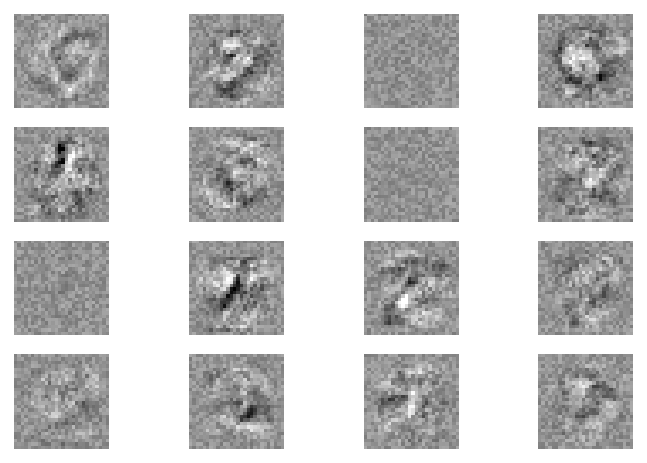

In [21]:
fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

In [23]:
# Cannot find the file, ERROR
# import pickle
# with open("data/mnist/pickled_mnist.pkl", "br") as fh:
#     data = pickle.load(fh)
# train_imgs = data[0]
# test_imgs = data[1]
# train_labels = data[2]
# test_labels = data[3]
# train_labels_one_hot = data[4]
# test_labels_one_hot = data[5]
# image_size = 28 # width and length
# no_of_different_labels = 10 #  i.e. 0, 1, 2, 3, ..., 9
# image_pixels = image_size * image_size